In this notebook we will be looking at abalones data set from UCI 

The dataset and description can be found here. 
https://archive.ics.uci.edu/ml/datasets/Abalone 

The goal is to predict which age category an observation belongs to based on the information given. There are 4177 observations with 7 given variables. The age can be determined by the number of Rings. We can roughly classify the age into young (1-9 Rings), medium (9, 10 Rings) and old (10+ Rings).

### Cleaning ###

We will begin by taking preliminary looks at the data1. 
We will do some data cleaning. We rename some columns so we may call them easier later on. We re encode the categorical variable using one-hot encoding. We then by scaling the continous variables so the mean was 0 and the variance is 1. 


### Visualization ### 

We plot several graphs of the original data. 
We look at the distributions of the different weight measurements that are given. We notice that the distributions for the medium and 


### Analysis ###

We use principal components analysis to understand the correlation structure. We see that most of the variance is explained by 1 component. We save this component and use it for analysis. 

Next we use Logistic Regression and K-Nearest Neighbors Classification on sex and PCA component. 

We find that both algorithms have similar out of sample accuracies at 55%. 

Next we use the scaled continous variables and the categorical variable (sex) to predict the age category with the same algorithms. We find the accuracies increases to about 65% for both Logistic Regression and KNN. 


Some information about the variables 

Name / Data Type / Measurement Unit / Description 
----------------------------- 
Sex / nominal / -- / M, F, and I (infant) 
Length / continuous / mm / Longest shell measurement 
Diameter	/ continuous / mm / perpendicular to length 
Height / continuous / mm / with meat in shell 
Whole weight / continuous / grams / whole abalone 
Shucked weight / continuous	/ grams / weight of meat 
Viscera weight / continuous / grams / gut weight (after bleeding) 
Shell weight / continuous / grams / after being dried 
Rings / integer / -- / +1.5 gives the age in years 

## Cleaning 


In [1]:
import pandas as pd 
import numpy as np
import sklearn as sk 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_raw = pd.read_csv("Abalones Dataset.csv")
data_raw.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Create new dataframe where we will make edits- called data1 
Rename columns so they can be easier to call later 

In [3]:
data1 = data_raw
data1["ShellWeight"] = data_raw["Shell weight"]
data1["ShuckedWeight"] = data_raw["Shucked weight"]
data1["VisceraWeight"] = data_raw["Viscera weight"]
data1["WholeWeight"] = data_raw["Whole weight"]
data1 = data1.drop({ "Shell weight", "Shucked weight", "Viscera weight", "Whole weight"},1)
data1.head()

,Sex,Length,Diameter,Height,Rings,ShellWeight,ShuckedWeight,VisceraWeight,WholeWeight
0,M,0.455,0.365,0.095,15,0.150,0.2245,0.1010,0.5140
1,M,0.350,0.265,0.090,7,0.070,0.0995,0.0485,0.2255
2,F,0.530,0.420,0.135,9,0.210,0.2565,0.1415,0.6770
3,M,0.440,0.365,0.125,10,0.155,0.2155,0.1140,0.5160
4,I,0.330,0.255,0.080,7,0.055,0.0895,0.0395,0.2050


Separate continous time variables form categorical variables from Output variables  
Create Age Categories based on number of rings

In [4]:
data_cont = data1.drop({"Sex", "Rings"}, axis =1)
data_cat = pd.get_dummies(data1["Sex"])

# Create Age Categories based on number of Rings 
data1["AgeCategory"] = 0
data1.loc[data1['Rings'] <9, "AgeCategory"] = 1
data1.loc[(data1['Rings'] >= 9) & (data1['Rings'] <= 10), "AgeCategory"] = 2
data1.loc[data1['Rings'] >10, "AgeCategory" ] = 3

Y = data1["AgeCategory"]

Scale data and place into dataframe with categorical variables

In [5]:
from sklearn.preprocessing import StandardScaler
data_cont_scaled = StandardScaler().fit_transform(data_cont)

In [6]:
numb_cols = data_cont_scaled.shape[1]
data_cont_scaled_df = pd.DataFrame(data_cont_scaled, columns = data_cont.columns)
data_scaled_full = pd.concat([data_cont_scaled_df, data_cat], axis =1)



## Visualization 

We start by plotting the various components of the weight according to the age category. 

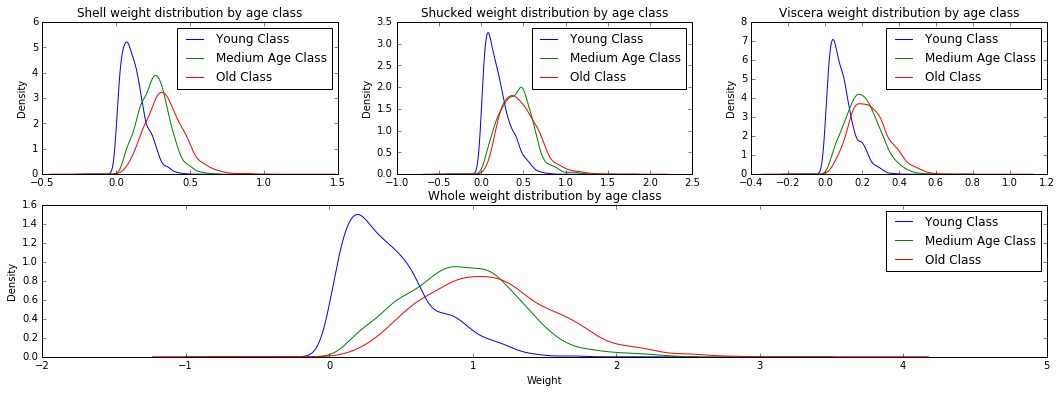

In [7]:
# Specify Parameters for graphs 
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

plt.subplot2grid((2,3),(0,0))
data_cont.ShellWeight[data1.AgeCategory == 1].plot(kind = 'kde')
data_cont.ShellWeight[data1.AgeCategory == 2].plot(kind = 'kde')
data_cont.ShellWeight[data1.AgeCategory == 3].plot(kind = 'kde')
plt.legend(("Young Class", "Medium Age Class", "Old Class"))
plt.title("Shell weight distribution by age class")

plt.subplot2grid((2,3),(0,1))
data_cont.ShuckedWeight[data1.AgeCategory == 1].plot(kind = 'kde')
data_cont.ShuckedWeight[data1.AgeCategory == 2].plot(kind = 'kde')
data_cont.ShuckedWeight[data1.AgeCategory == 3].plot(kind = 'kde')
plt.legend(("Young Class", "Medium Age Class", "Old Class"))
plt.title("Shucked weight distribution by age class")

plt.subplot2grid((2,3),(0,2))
data_cont.VisceraWeight[data1.AgeCategory == 1].plot(kind = 'kde')
data_cont.VisceraWeight[data1.AgeCategory == 2].plot(kind = 'kde')
data_cont.VisceraWeight[data1.AgeCategory == 3].plot(kind = 'kde')
plt.legend(("Young Class", "Medium Age Class", "Old Class"))
plt.title("Viscera weight distribution by age class")

plt.subplot2grid((2,3),(1,0), colspan = 3)
# Plot kernel density estimate of the whole weight by age category 
data_cont.WholeWeight[data1.AgeCategory == 1].plot(kind = 'kde')
data_cont.WholeWeight[data1.AgeCategory == 2].plot(kind = 'kde')
data_cont.WholeWeight[data1.AgeCategory == 3].plot(kind = 'kde')

plt.xlabel("Weight")
plt.legend(("Young Class", "Medium Age Class", "Old Class"))
plt.title("Whole weight distribution by age class")

** Discussion ** 
We see that the smoothed distributions for the Medium and Old class are extremely similar. The young class look incredibly somewhat differnet from the other two classes.  
The shell weight for the medium and old class seem the most different. 

Next we plot the Sex vs Age distribution. 

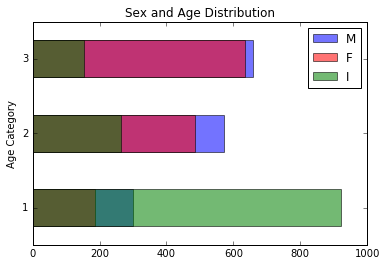

In [8]:
data_M = data1.AgeCategory[data1.Sex == 'M'].value_counts().sort_index()
data_F = data1.AgeCategory[data1.Sex == 'F'].value_counts().sort_index()
data_I = data1.AgeCategory[data1.Sex == 'I'].value_counts().sort_index()

data_M.plot(kind = 'barh', color = "b", label = "M", alpha = 0.55)
data_F.plot(kind = 'barh', color = "r", label = "F", alpha = 0.55)
data_I.plot(kind = 'barh', color = "g", label = "I", alpha = 0.55)

plt.ylabel("Age Category")
plt.title("Sex and Age Distribution")
plt.legend(loc='best')


** Discussion **
The dark green represents the limit to where all 3 are in common.  
The deep purple in the top two  bar graphs indicate that "I" had the least number of observations in those two cases.
Male and female observations were more common than the "I" case in the old and medium cases.  
For the younger observations, there were many more "I" cases.   
The split between the unidentified cases versus male-female cases makes sense as the reproductive parts are not always clear at younger ages for these marine creatures. 

In [9]:
data1["Volume"] = data1["Length"]*data1["Diameter"]*data1["Height"]
data1["Vol*Weight"] = data1["Volume"] * data1["WholeWeight"]

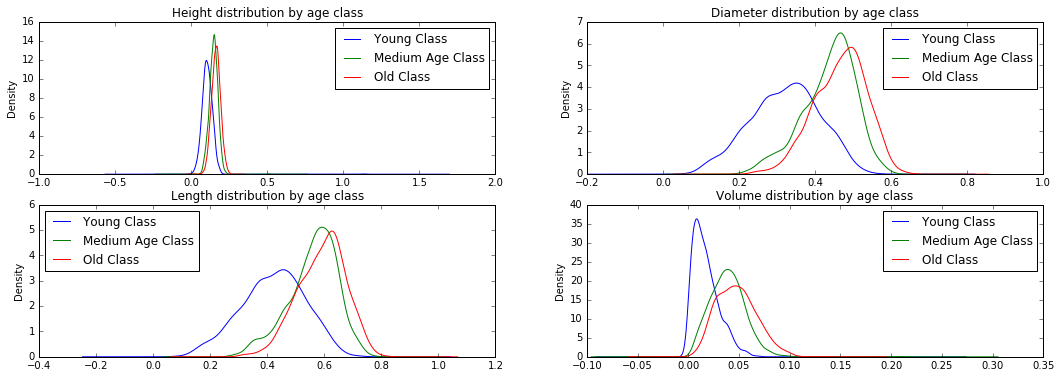

In [10]:
# Specify Parameters for graphs 
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55


plt.subplot2grid((2,2),(0,0))
data1.Height[data1.AgeCategory == 1].plot(kind = 'kde')
data1.Height[data1.AgeCategory == 2].plot(kind = 'kde')
data1.Height[data1.AgeCategory == 3].plot(kind = 'kde')
plt.legend(("Young Class", "Medium Age Class", "Old Class"))
plt.title("Height distribution by age class")

plt.subplot2grid((2,2),(0,1))
data1.Diameter[data1.AgeCategory == 1].plot(kind = 'kde')
data1.Diameter[data1.AgeCategory == 2].plot(kind = 'kde')
data1.Diameter[data1.AgeCategory == 3].plot(kind = 'kde')
plt.legend(("Young Class", "Medium Age Class", "Old Class"), loc = 'best')
plt.title("Diameter distribution by age class")

plt.subplot2grid((2,2),(1,0))
data1.Length[data1.AgeCategory == 1].plot(kind = 'kde')
data1.Length[data1.AgeCategory == 2].plot(kind = 'kde')
data1.Length[data1.AgeCategory == 3].plot(kind = 'kde')
plt.legend(("Young Class", "Medium Age Class", "Old Class"), loc = 'best')
plt.title("Length distribution by age class")

plt.subplot2grid((2,2),(1,1))
# Plot kernel density estimate of the whole weight by age category 
data1.Volume[data1.AgeCategory == 1].plot(kind = 'kde')
data1.Volume[data1.AgeCategory == 2].plot(kind = 'kde')
data1.Volume[data1.AgeCategory == 3].plot(kind = 'kde')

plt.legend(("Young Class", "Medium Age Class", "Old Class"))
plt.title("Volume distribution by age class")

** Discussion ** 

Aside from height, the young class looks very different from the medium and old class. There is still significant overlap between the young class distribution and the other two distributions.     
The medium and old class seem to have very similar distributions. 

## Analysis 

In [11]:
from sklearn.decomposition import PCA 
pca1 = PCA(n_components=7)
pca1.fit(data_cont_scaled)
pca_score = pca1.explained_variance_ratio_
print(pca_score)

[ 0.90787315  0.03991891  0.02390638  0.01629598  0.00923627  0.0018183
  0.00095101]


Most of the variance is explained by one component 
Will take and store it separately 

In [12]:
pca_1comp = PCA(n_components=1).fit_transform(data_cont)
pca_1comp2 = pd.Series(pca_1comp[:,0])

Combine continous and categorical data then split data into test and training sets 
# Remember this is for PCA and categorical data


In [13]:
pcaAndCat = pd.concat([pca_1comp2,data_cat], axis = 1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pcaAndCat,Y, test_size = 0.25)


In [15]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

Perform cross validation to get accuracy score 

In [16]:
log_reg = LogisticRegression()
print(cross_val_score(log_reg, X_train,y_train,cv= 8).mean())

0.546956191046


Fit logistic regression to training data then test on out of sample data 

In [17]:
log_reg_fit = LogisticRegression().fit(X_train,y_train)
logisitic_out_sample_predictions = log_reg_fit.predict(X_test)
print("Out of sample Logisitic regression results \n \n")
print(metrics.classification_report(y_test,logisitic_out_sample_predictions))
print(metrics.confusion_matrix(y_test, logisitic_out_sample_predictions))

Out of sample Logisitic regression results 
 

             precision    recall  f1-score   support

          1       0.62      0.76      0.68       347
          2       0.31      0.13      0.18       320
          3       0.55      0.70      0.61       378

avg / total       0.50      0.54      0.50      1045

[[262  40  45]
 [103  42 175]
 [ 58  55 265]]


About 50/50 accuracy. 
From the confusion matrix, we can see that logistic regression mis classifies the second class as the third class very often. 
This is understandable as the distributions for the independent variables are very similar. So the algorithm has trouble distinguishing them. 
It also mis classifies many of the case 2 as case 1 which is also interesting. 

Quick attempt of logistic regression with weighted classes... 
Very difficult to find optimal weighting scheme 

In [18]:
logCV = LogisticRegressionCV(class_weight={1:2, 2:3, 3:2}).fit(X_train,y_train)
logCV_OS_predict = logCV.predict(X_test)
print("Out of sample Log CV results  \n \n")
print(metrics.classification_report(y_test,logCV_OS_predict))
print(metrics.confusion_matrix(y_test, logCV_OS_predict))

Out of sample Log CV results  
 

             precision    recall  f1-score   support

          1       0.72      0.68      0.70       347
          2       0.37      0.52      0.43       320
          3       0.61      0.43      0.50       378

avg / total       0.57      0.54      0.55      1045

[[237 101   9]
 [ 60 165  95]
 [ 31 186 161]]


Let's try KNN method with initial parameter tuning 

We want to find the optimal number of neighbors to use. 
To find the optimal number, we will train a KNN with the number of neighbors then use cross 

In [19]:
from sklearn.neighbors import KNeighborsClassifier

KNN_parameter_tuning_df = pd.DataFrame(data = {'CV': 0,
                                            'Num Neighbors':3}, index = range(1,3,1))
j = 1 # index for number of loops 
for num_neighbors in range(3, 40, 1):
    KNN_sample = KNeighborsClassifier(n_neighbors = num_neighbors)
    CV = cross_val_score(KNN_sample, X_train,y_train,cv= 8).mean()
    KNN_parameter_tuning_df.loc[j] = [CV, num_neighbors]
    j = j+1 

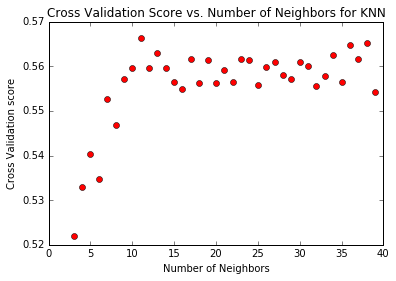

In [20]:
plt.plot(KNN_parameter_tuning_df['Num Neighbors'], KNN_parameter_tuning_df['CV'], 'ro')
plt.title("Cross Validation Score vs. Number of Neighbors for KNN")
plt.ylabel("Cross Validation score")
plt.xlabel("Number of Neighbors")


We can see around there is a divergence around the 13th neighbor where the CV scores increase by a seemingly significant amount 
By peaking at the data frame 

In [21]:
KNN_parameter_tuning_df.head(20)

,CV,Num Neighbors
1,0.522033,3.0
2,0.532881,4.0
3,0.540253,5.0
4,0.534804,6.0
5,0.552661,7.0
6,0.546941,8.0
7,0.557157,9.0
8,0.559694,10.0
9,0.566387,11.0
10,0.559681,12.0


In [22]:
KNN_parameter_tuning_df.loc[KNN_parameter_tuning_df["CV"].idxmax()]

CV                0.566387
Num Neighbors    11.000000
Name: 9, dtype: float64

In [23]:
meanCV = KNN_parameter_tuning_df[KNN_parameter_tuning_df["Num Neighbors"]>10].CV.mean()

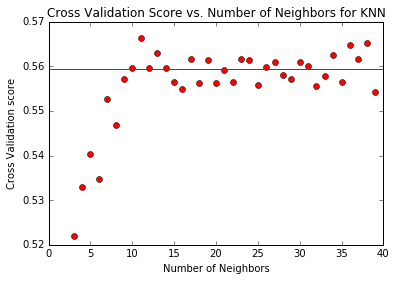

In [24]:
plt.plot(KNN_parameter_tuning_df['Num Neighbors'], KNN_parameter_tuning_df['CV'], 'ro')
plt.title("Cross Validation Score vs. Number of Neighbors for KNN")
plt.ylabel("Cross Validation score")
plt.xlabel("Number of Neighbors")
plt.axhline(y = meanCV, color = "g")

So a KNN with 14 neighbors should be a decent model to use. 
Let's re fit a KNN with 14 neighbors and see what the out of sample error rate is 

In [25]:
KNN14 = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)
KNN14_predict = KNN14.predict(X_test)
print("Out of sample KNN results \n \n")
print(metrics.classification_report(y_test,KNN14_predict))
print(metrics.confusion_matrix(y_test, KNN14_predict))

Out of sample KNN results 
 

             precision    recall  f1-score   support

          1       0.72      0.71      0.72       347
          2       0.38      0.41      0.39       320
          3       0.52      0.49      0.51       378

avg / total       0.54      0.54      0.54      1045

[[248  58  41]
 [ 57 130 133]
 [ 40 151 187]]


The KNN algorithm does slightly better than logistic regression. 

We see that the algorithm makes the most mistakes classifying the two older groups.

Predict 2, actual 1 = 55 is very close to Predict 3, actual 1 = 52 
Evenly balances misclassifying 2 3 as 1

and 
Predict 1, actual 2 = 63 ~~ 2 * Predict 1, actual 3 

Beginning to tell difference between 2 and 3 when predicting 1. 

# Let's try this again but scaled continous data and categorical variable

In [26]:
numb_cols = data_cont_scaled.shape[1]
data_cont_scaled_df = pd.DataFrame(data_cont_scaled, columns = range(numb_cols))
data_scaled_full = pd.concat([data_cont_scaled_df, data_cat], axis =1)

# Split the scaled and categorical data set into test and training set 
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_scaled_full,Y, test_size = 0.25)


We will follow a similar procedure as earlier. 
We train a logistic regression on the training data1. 
Then we will compute the predictions using the model on the test data1. 
We then compute some classification metrics on the results of the test predictions 

In [27]:
log_reg2 = LogisticRegression()
print("Logistic Regression CV Score: ")
print(cross_val_score(log_reg2, X_train1, y_train1, cv = 8).mean(), "\n")
log_reg2_fit = LogisticRegression().fit(X_train1, y_train1)
log_reg2_predictions = log_reg2_fit.predict(X_test1)
print("Out of sample Logisitic regression results \n \n")
print(metrics.classification_report(y_test1, log_reg2_predictions))
print(metrics.confusion_matrix(y_test1, log_reg2_predictions))

Logistic Regression CV Score: 
0.65356873956 

Out of sample Logisitic regression results 
 

             precision    recall  f1-score   support

          1       0.71      0.78      0.74       367
          2       0.46      0.41      0.43       330
          3       0.65      0.65      0.65       348

avg / total       0.61      0.62      0.62      1045

[[287  67  13]
 [ 86 135 109]
 [ 31  90 227]]


Results are much better than the PCA. With more information, the regression classifies the medium class correctly much more often. (137-30)  


# KNN with scaled data 

We will now repeat the process as with the PCA data 
We will find the optimal parameter for the KNN algorithm. 
With the optimal parameter, we will train the algorithm (using the training data). Then we will find the accuracy on the out of sample data1. 

In [28]:
KNN_parameter_tuning_scaled_df = pd.DataFrame(data = {'CV': 0,
                                            'Num Neighbors':3}, index = range(1,3,1))
j = 1 # index for number of loops 
for num_neighbors in range(3, 40, 1):
    KNN_sample = KNeighborsClassifier(n_neighbors = num_neighbors)
    CV = cross_val_score(KNN_sample, X_train1,y_train1,cv= 8).mean()
    KNN_parameter_tuning_scaled_df.loc[j] = [CV, num_neighbors]
    j = j+1 

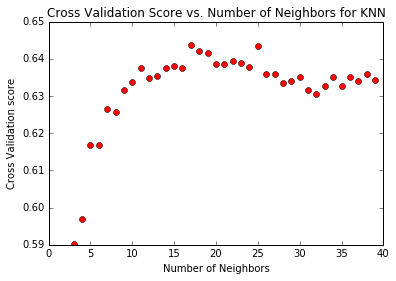

In [29]:
plt.plot(KNN_parameter_tuning_scaled_df['Num Neighbors'], KNN_parameter_tuning_scaled_df['CV'], 'ro')
plt.title("Cross Validation Score vs. Number of Neighbors for KNN")
plt.ylabel("Cross Validation score")
plt.xlabel("Number of Neighbors")

In [30]:
KNN_parameter_tuning_scaled_df.loc[KNN_parameter_tuning_scaled_df["CV"].idxmax()]

CV                0.643682
Num Neighbors    17.000000
Name: 15, dtype: float64

In [31]:
KNN_scaled_fit = KNeighborsClassifier(n_neighbors = 14).fit(X_train1, y_train1)
KNN_scaled_predict = KNN_scaled_fit.predict(X_test1)
print("Out of sample KNN results \n \n")
print(metrics.classification_report(y_test1, KNN_scaled_predict))
print(metrics.confusion_matrix(y_test1, KNN_scaled_predict))

Out of sample KNN results 
 

             precision    recall  f1-score   support

          1       0.75      0.74      0.74       367
          2       0.46      0.52      0.49       330
          3       0.66      0.59      0.62       348

avg / total       0.63      0.62      0.62      1045

[[270  81  16]
 [ 68 172  90]
 [ 22 120 206]]


These results are also much better than PCA example 
The correct number in each class is higher. Overall accuracy is higher 